## Mean Reversion FX

In [22]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

In [35]:
data = yf.Ticker('GBPUSD=X').history(period='20y', interval="1d")[['Close']]
data.head()

,Close
Date,
2004-03-22 00:00:00+00:00,1.847507
2004-03-23 00:00:00+00:00,1.852092
2004-03-24 00:00:00+00:00,1.825284
2004-03-25 00:00:00+00:00,1.807991
2004-03-26 00:00:00+00:00,1.817686


In [36]:
ma = 21
data['returns'] = np.log(data["Close"]).diff()
data['ma'] = data['Close'].rolling(ma).mean()
data['ratio'] = data['Close'] / data['ma']
data['ratio'].describe()

count    5181.000000
mean        0.999359
std         0.014688
min         0.906892
25%         0.991099
50%         1.000064
75%         1.008601
max         1.062252
Name: ratio, dtype: float64

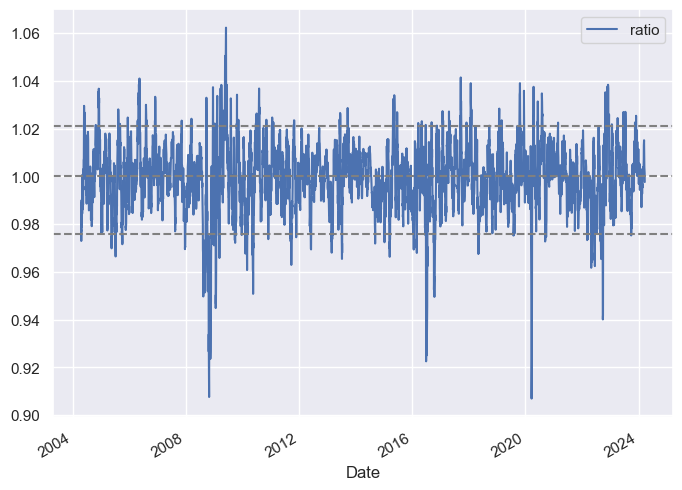

In [37]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(data['ratio'].dropna(), percentiles)

data['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--')

<AxesSubplot:xlabel='Date'>

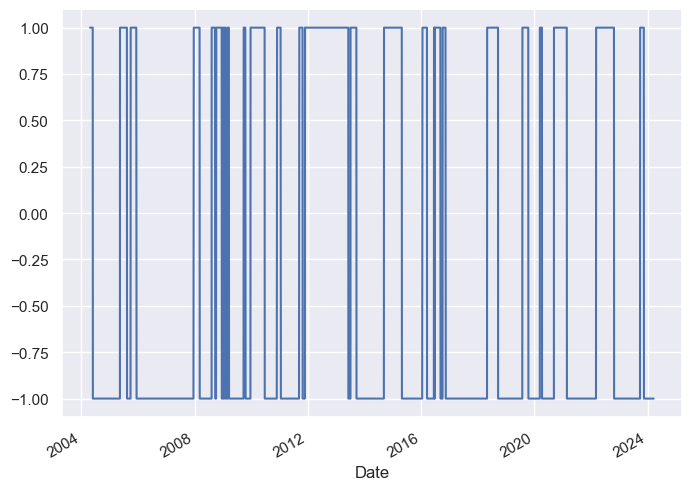

In [38]:
short = p[-1]
long = p[0]
data['position'] = np.where(data.ratio > short, -1, np.nan)
data['position'] = np.where(data.ratio < long, 1, data['position'])
data['position'] = data['position'].ffill()

data.position.dropna().plot()

Return Buy & Hold:
-0.3133966877037755
Strategy Return:
0.7086765358649405


/var/folders/vm/77fdm2ks1xz616jlwd2q7g0w0000gn/T/ipykernel_14180/3168416158.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(data['returns'].dropna()).cumprod()[-1] -1)
/var/folders/vm/77fdm2ks1xz616jlwd2q7g0w0000gn/T/ipykernel_14180/3168416158.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.exp(data['strat_return'].dropna()).cumprod()[-1] - 1)


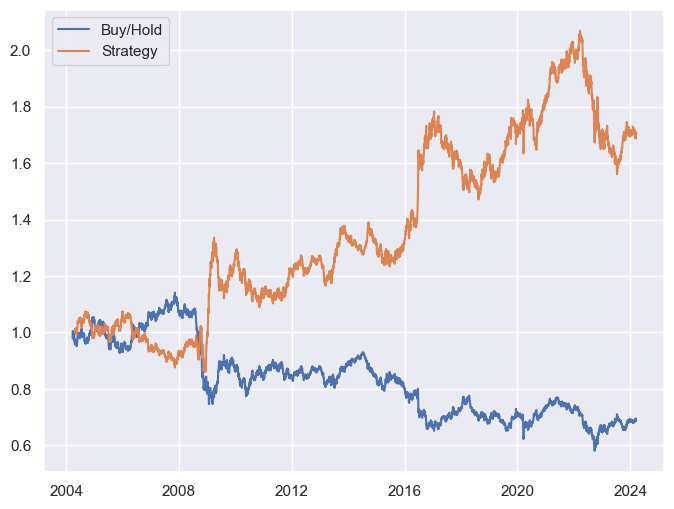

In [39]:
data['strat_return'] = data['returns'] * data['position'].shift()

plt.plot(np.exp(data['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(data['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend()
print('Return Buy & Hold:')
print(np.exp(data['returns'].dropna()).cumprod()[-1] -1)
print('Strategy Return:')
print(np.exp(data['strat_return'].dropna()).cumprod()[-1] - 1)

In [1]:
# Created from a YouTube Video on FX strategies - Edoardo Alberto Donolato